<a href="https://colab.research.google.com/github/jpscard/Unyleya_IA_Specialization/blob/main/Sumariza%C3%A7%C3%A3o_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

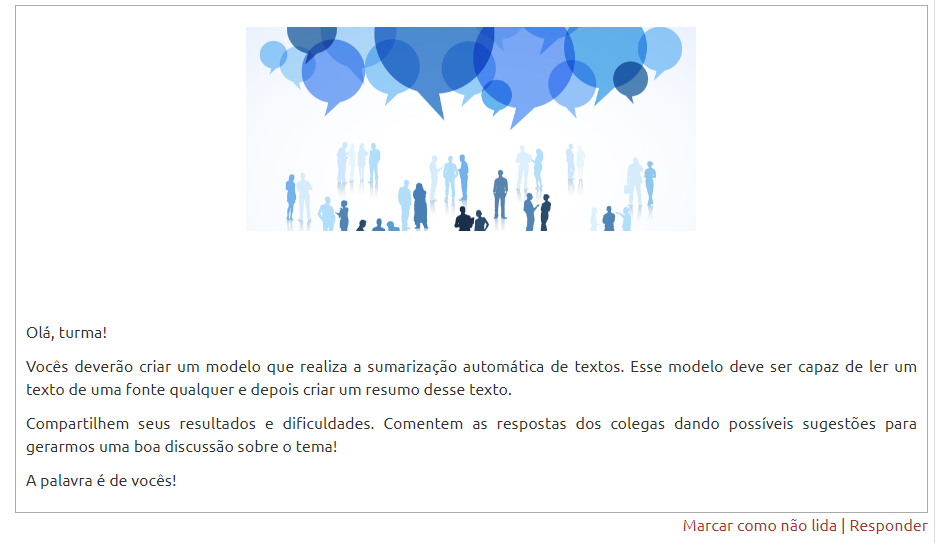

### Aluno: João Paulo Cardoso

## 0-Importanto bibliotecas

In [6]:
import nltk
import string
from heapq import nlargest

## 1- Carregando e lendo arquivo de texto

In [10]:
with open("/content/arquivo.txt","r", encoding="utf8") as f: 
    text=f.read()

In [11]:
print(text)

Um dos problemas mais clássicos em diversas ciências é a classificação. Classificar é basicamente atribuir uma característica que defina um grupo ou parâmetro a certo elemento, baseado num conjunto de critérios. Por exemplo, a classificação ajuda na busca por livros numa biblioteca onde os livros são agrupados de acordo com autor, ano, assunto, dentre outras catacterísticas que se julguem necessárias. Dessa forma, quando um novo livro chega, é fácil colocá-lo no lugar, ou seja, o lugar onde será facilmente encontrado por qualquer um que saiba o assunto, autor ou algo mais sobre o livro procurado.


## 2 - Quantificando palavras no texto

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#print(STOPWORDS)
print("Existem {} palavras em todo o texto.". format(len(text)))
WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

Existem 603 palavras em todo o texto.


## 3- Sumarização

In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
print(text.count("."))
print(string.punctuation)
nopuch=[char for char in text if char not in string.punctuation]
nopuch="".join(nopuch)
#print(nopuch)

process_text=[word for word in nopuch.split() if word.lower() not in nltk.corpus.stopwords.words('english')]
#print(process_text)

#create word freq
word_freq={}
for word in process_text:
    if word not in word_freq:
        word_freq[word]=1
    else:
        word_freq[word]=word_freq[word]+1

#dict(sorted(word_freq.items(),key=lambda item:item[1], reverse=True))

max_freq=max(word_freq.values())

for word in word_freq.keys():
    word_freq[word]=(word_freq[word]/max_freq)

#create sent freq
sent_list=nltk.sent_tokenize(text)

sent_score={}
for sent in sent_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_freq.keys():
            if sent not in sent_score.keys():
                sent_score[sent]=word_freq[word]
            else:
                sent_score[sent]=sent_score[sent]+word_freq[word]
                
#dict(sorted(sent_score.items(),key=lambda item:item[1], reverse=True))
       
summary_sent=nlargest(3,sent_score, key=sent_score.get)

summary=" ".join(summary_sent)

summary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


4
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'Dessa forma, quando um novo livro chega, é fácil colocá-lo no lugar, ou seja, o lugar onde será facilmente encontrado por qualquer um que saiba o assunto, autor ou algo mais sobre o livro procurado. Por exemplo, a classificação ajuda na busca por livros numa biblioteca onde os livros são agrupados de acordo com autor, ano, assunto, dentre outras catacterísticas que se julguem necessárias. Classificar é basicamente atribuir uma característica que defina um grupo ou parâmetro a certo elemento, baseado num conjunto de critérios.'